In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Mumbai1.csv")
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [3]:
data.shape

(6347, 19)

In [4]:
data.drop(["Unnamed: 0"],axis=1, inplace=True)
data.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [5]:
data.isna().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [6]:
for col in data:
        print(f'{col} : {data[col].describe()}\n')

Price : count    6.347000e+03
mean     1.515401e+07
std      2.015943e+07
min      2.000000e+06
25%      5.300000e+06
50%      9.500000e+06
75%      1.750000e+07
max      4.200000e+08
Name: Price, dtype: float64

Area : count    6347.000000
mean     1004.327084
std       556.375703
min       200.000000
25%       650.000000
50%       905.000000
75%      1182.000000
max      8511.000000
Name: Area, dtype: float64

Location : count         6347
unique         413
top       Kharghar
freq           533
Name: Location, dtype: object

No. of Bedrooms : count    6347.000000
mean        1.910036
std         0.863304
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: No. of Bedrooms, dtype: float64

New/Resale : count    6347.000000
mean        0.341736
std         0.474329
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: New/Resale, dtype: float64

Gymnasium : count    6347.

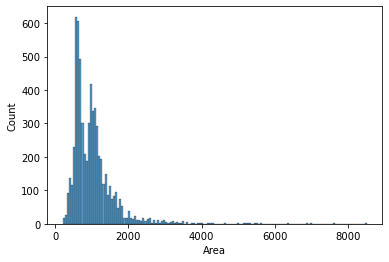

In [7]:
sns.histplot(data["Area"]);

In [8]:
len(data[data["Area"]>1885])

324

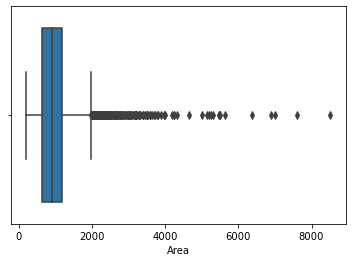

In [9]:
sns.boxplot(data["Area"]);

In [10]:
data2 = data[data["Area"]<=1885]
data.shape[0] - data2.shape[0]

324

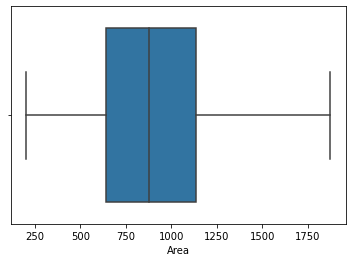

In [11]:
sns.boxplot(data2["Area"]);

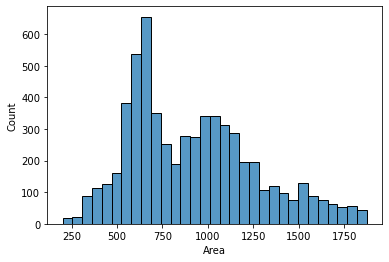

In [12]:
sns.histplot(data2["Area"]);

In [13]:
data2.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [14]:
print(data2["Location"].value_counts())

Kharghar                  509
Thane West                406
Mira Road East            387
Ulwe                      314
Kalyan West               176
                         ... 
Sector 2 Ulwe               1
Govind nagar                1
Krishanlal Marwah Marg      1
Sector-9 Ulwe               1
Padle Gaon                  1
Name: Location, Length: 396, dtype: int64


In [15]:
value_counts_of_locations = data.Location.value_counts(ascending=False)

In [16]:
len(value_counts_of_locations[value_counts_of_locations==1])

177

In [17]:
location_counts_1 = value_counts_of_locations[value_counts_of_locations==1]

In [18]:
location_counts_1

Vichumbe             1
Sector 21 Ulwe       1
Gulmohar Road        1
Sector 19A Nerul     1
Vile Parle E         1
                    ..
worli sea face       1
Sea Face             1
Shiv Sagar Estate    1
Natakwala Lane       1
Padle Gaon           1
Name: Location, Length: 177, dtype: int64

In [19]:
data2["Location"] = data2["Location"].apply(lambda x : "other" if x in location_counts_1 else x)

In [20]:
data.Location.nunique() - data2.Location.nunique()

179

In [21]:
data2.Location.unique()

array(['Kharghar', 'other', 'Sector 18 Kharghar', 'Sector 20 Kharghar',
       'Sector 15 Kharghar', 'Dombivali', 'Prabhadevi', 'Jogeshwari West',
       'Kalyan East', 'Malad East', 'Virar East', 'Virar', 'Malad West',
       'Borivali East', 'Mira Road East', 'Goregaon West',
       'Kandivali West', 'Borivali West', 'Kandivali East',
       'Andheri East', 'Goregaon East', 'Wadala', 'Ulwe', 'Dahisar',
       'kandivali', 'Goregaon', 'Bhandup West',
       'thakur village kandivali east', 'Santacruz West', 'Kanjurmarg',
       'Marol', 'Parel', 'Lower Parel', 'Jogeshwari East', 'Chembur East',
       'Mulund', 'Nalasopara West', 'raheja vihar', 'Powai Lake',
       'MHADA Colony 20', 'Tolaram Colony', 'Taloja', 'Vangani',
       'Sector 5 Ulwe', 'Sector 17 Ulwe', 'Sector9 Kamothe',
       'Sector 19 Kharghar', 'Navi Basti', 'Sector12 Kamothe',
       'Sector 21 Kamothe', 'taloja panchanand', 'Virar West', 'Chembur',
       'Sector 20 Kamothe', 'Sector 22 Kamothe', 'Sector 18 Kamothe'

In [22]:
data2.Location = data2.Location.str.upper()

In [23]:
data2.Location.unique()

array(['KHARGHAR', 'OTHER', 'SECTOR 18 KHARGHAR', 'SECTOR 20 KHARGHAR',
       'SECTOR 15 KHARGHAR', 'DOMBIVALI', 'PRABHADEVI', 'JOGESHWARI WEST',
       'KALYAN EAST', 'MALAD EAST', 'VIRAR EAST', 'VIRAR', 'MALAD WEST',
       'BORIVALI EAST', 'MIRA ROAD EAST', 'GOREGAON WEST',
       'KANDIVALI WEST', 'BORIVALI WEST', 'KANDIVALI EAST',
       'ANDHERI EAST', 'GOREGAON EAST', 'WADALA', 'ULWE', 'DAHISAR',
       'KANDIVALI', 'GOREGAON', 'BHANDUP WEST',
       'THAKUR VILLAGE KANDIVALI EAST', 'SANTACRUZ WEST', 'KANJURMARG',
       'MAROL', 'PAREL', 'LOWER PAREL', 'JOGESHWARI EAST', 'CHEMBUR EAST',
       'MULUND', 'NALASOPARA WEST', 'RAHEJA VIHAR', 'POWAI LAKE',
       'MHADA COLONY 20', 'TOLARAM COLONY', 'TALOJA', 'VANGANI',
       'SECTOR 5 ULWE', 'SECTOR 17 ULWE', 'SECTOR9 KAMOTHE',
       'SECTOR 19 KHARGHAR', 'NAVI BASTI', 'SECTOR12 KAMOTHE',
       'SECTOR 21 KAMOTHE', 'TALOJA PANCHANAND', 'VIRAR WEST', 'CHEMBUR',
       'SECTOR 20 KAMOTHE', 'SECTOR 22 KAMOTHE', 'SECTOR 18 KAMOTHE'

In [24]:
data.Location.nunique() - data2.Location.nunique()

180

In [25]:
data2.shape

(6023, 18)

In [26]:
data2.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,KHARGHAR,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,KHARGHAR,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,KHARGHAR,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,KHARGHAR,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,KHARGHAR,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [27]:
data3 = data2.drop(["New/Resale","Gymnasium","Lift Available","Car Parking","Maintenance Staff","24x7 Security","Children's Play Area","Clubhouse","Intercom","Landscaped Gardens","Indoor Games","Gas Connection","Jogging Track","Swimming Pool"],axis=1)

In [28]:
data3.head()

,Price,Area,Location,No. of Bedrooms
0,4850000,720,KHARGHAR,1
1,4500000,600,KHARGHAR,1
2,6700000,650,KHARGHAR,1
3,4500000,650,KHARGHAR,1
4,5000000,665,KHARGHAR,1


In [29]:
data3["PriceByArea"] = data["Price"]/data["Area"]

In [30]:
data3.head()

,Price,Area,Location,No. of Bedrooms,PriceByArea
0,4850000,720,KHARGHAR,1,6736.111111
1,4500000,600,KHARGHAR,1,7500.000000
2,6700000,650,KHARGHAR,1,10307.692308
3,4500000,650,KHARGHAR,1,6923.076923
4,5000000,665,KHARGHAR,1,7518.796992


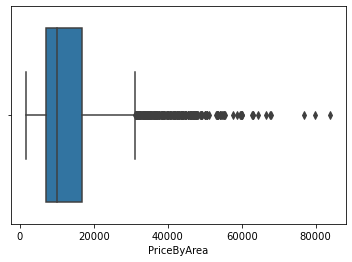

In [31]:
sns.boxplot(data3["PriceByArea"]);

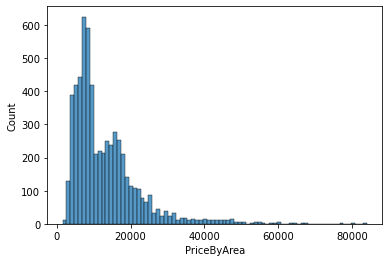

In [32]:
sns.histplot(data3["PriceByArea"]);

In [33]:
data4 = data3[data3["PriceByArea"]<28950]

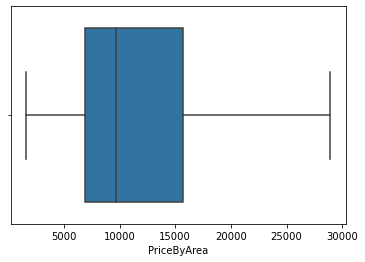

In [34]:
sns.boxplot(data4["PriceByArea"]);

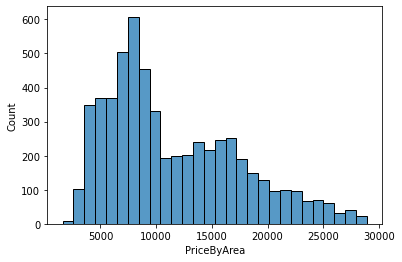

In [35]:
sns.histplot(data4["PriceByArea"]);

In [36]:
data3.shape[0] - data4.shape[0]

329

In [37]:
data4.shape

(5694, 5)

In [38]:
data4.head()

,Price,Area,Location,No. of Bedrooms,PriceByArea
0,4850000,720,KHARGHAR,1,6736.111111
1,4500000,600,KHARGHAR,1,7500.000000
2,6700000,650,KHARGHAR,1,10307.692308
3,4500000,650,KHARGHAR,1,6923.076923
4,5000000,665,KHARGHAR,1,7518.796992


In [39]:
data4.PriceByArea.describe()

count     5694.000000
mean     11507.858893
std       5959.522458
min       1597.444089
25%       6926.242783
50%       9671.886469
75%      15722.538052
max      28914.590747
Name: PriceByArea, dtype: float64

In [40]:
data4["AreaByBedrooms"] = data4["Area"]/data4["No. of Bedrooms"]

In [41]:
data4.head()

,Price,Area,Location,No. of Bedrooms,PriceByArea,AreaByBedrooms
0,4850000,720,KHARGHAR,1,6736.111111,720.0
1,4500000,600,KHARGHAR,1,7500.000000,600.0
2,6700000,650,KHARGHAR,1,10307.692308,650.0
3,4500000,650,KHARGHAR,1,6923.076923,650.0
4,5000000,665,KHARGHAR,1,7518.796992,665.0


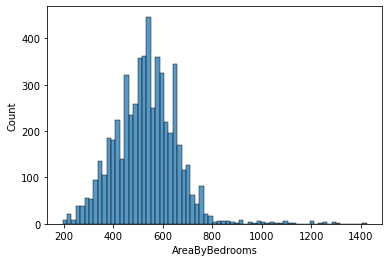

In [42]:
sns.histplot(data4["AreaByBedrooms"]);

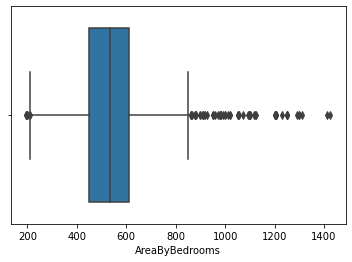

In [43]:
sns.boxplot(data4["AreaByBedrooms"]);

In [44]:
data4[data4["AreaByBedrooms"]>=900]

,Price,Area,Location,No. of Bedrooms,PriceByArea,AreaByBedrooms
356,9600000,900,JANKALYAN NAGAR,1,10666.666667,900.0
934,13500000,950,WADALA EAST WADALA,1,14210.526316,950.0
1194,17500000,1050,ANDHERI EAST,1,16666.666667,1050.0
1195,16500000,1020,ANDHERI EAST,1,16176.470588,1020.0
1382,3700000,925,NAIGAON EAST,1,4000.000000,925.0
2147,19000000,1411,MAROL,1,13465.627215,1411.0
2179,14900000,1200,MALAD EAST,1,12416.666667,1200.0
2680,12800000,950,CHEMBUR,1,13473.684211,950.0
3085,9500000,981,MIRA ROAD EAST,1,9683.995923,981.0
3326,23500000,1310,NERUL,1,17938.931298,1310.0


In [45]:
len(data4[data4["AreaByBedrooms"]<=250])

42

In [46]:
data5 = data4[(data4["AreaByBedrooms"]>=250) & (data4["AreaByBedrooms"]<=830)]

In [47]:
data5.shape

(5582, 6)

In [48]:
data5.sample(10)

,Price,Area,Location,No. of Bedrooms,PriceByArea,AreaByBedrooms
3377,5600000,560,KHARGHAR,1,10000.000000,560.000000
5277,6187000,990,DOMBIVALI,2,6249.494949,495.000000
1816,4000000,625,SECTOR 18 KAMOTHE,1,6400.000000,625.000000
902,9900000,1150,KHARGHAR,2,8608.695652,575.000000
4121,9800000,1250,MIRA ROAD EAST,3,7840.000000,416.666667
3456,15000000,1200,KHARGHAR,2,12500.000000,600.000000
2759,6500000,400,BORIVALI WEST,1,16250.000000,400.000000
122,4300000,640,KHARGHAR,1,6718.750000,640.000000
4501,3920000,1120,BOISAR,3,3500.000000,373.333333
5007,8500000,840,THANE WEST,2,10119.047619,420.000000


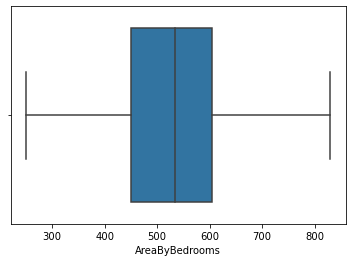

In [49]:
sns.boxplot(data5["AreaByBedrooms"]);

In [50]:
data5.head()

,Price,Area,Location,No. of Bedrooms,PriceByArea,AreaByBedrooms
0,4850000,720,KHARGHAR,1,6736.111111,720.0
1,4500000,600,KHARGHAR,1,7500.000000,600.0
2,6700000,650,KHARGHAR,1,10307.692308,650.0
3,4500000,650,KHARGHAR,1,6923.076923,650.0
4,5000000,665,KHARGHAR,1,7518.796992,665.0


In [51]:
data6 = data5.drop(["PriceByArea","AreaByBedrooms"],axis=1)
data.shape[0] - data6.shape[0]

765

In [52]:
data6.head()

,Price,Area,Location,No. of Bedrooms
0,4850000,720,KHARGHAR,1
1,4500000,600,KHARGHAR,1
2,6700000,650,KHARGHAR,1
3,4500000,650,KHARGHAR,1
4,5000000,665,KHARGHAR,1


In [53]:
for col in data6:
        print(f'{col} : {data[col].describe()}\n')

Price : count    6.347000e+03
mean     1.515401e+07
std      2.015943e+07
min      2.000000e+06
25%      5.300000e+06
50%      9.500000e+06
75%      1.750000e+07
max      4.200000e+08
Name: Price, dtype: float64

Area : count    6347.000000
mean     1004.327084
std       556.375703
min       200.000000
25%       650.000000
50%       905.000000
75%      1182.000000
max      8511.000000
Name: Area, dtype: float64

Location : count         6347
unique         413
top       Kharghar
freq           533
Name: Location, dtype: object

No. of Bedrooms : count    6347.000000
mean        1.910036
std         0.863304
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: No. of Bedrooms, dtype: float64



In [54]:
Loc = {v:k for k, v in enumerate(data6.Location.unique())}
data6.Location = data6.Location.map(Loc)
data6.Location.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [55]:
X = data6.drop(["Price"],axis=1)
y = data6["Price"]

In [56]:
X.head()

,Area,Location,No. of Bedrooms
0,720,0,1
1,600,0,1
2,650,0,1
3,650,0,1
4,665,0,1


In [57]:
y.head()

0    4850000
1    4500000
2    6700000
3    4500000
4    5000000
Name: Price, dtype: int64

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pickle.dump(scaler,open('scaling.pkl','wb'))

In [60]:
model = XGBRegressor()

In [61]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
model.score(X_test,y_test)

0.8350737896361149

In [63]:
y_pred = model.predict(X_test)

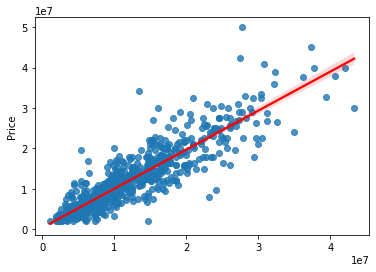

In [64]:
sns.regplot(y_pred,y_test, line_kws={'color':'red'});

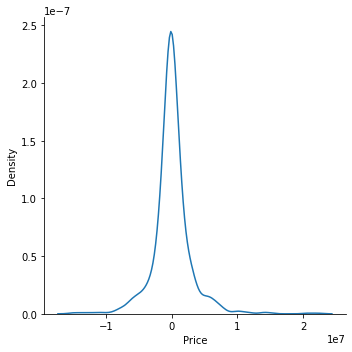

In [65]:
residuals = y_test-y_pred
sns.displot(residuals,kind='kde');

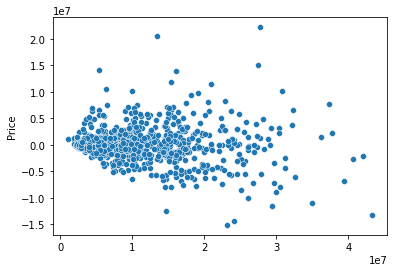

In [66]:
sns.scatterplot(y_pred,residuals);

In [67]:
r2_score(y_test,y_pred)

0.8350737896361149

In [68]:
pickle.dump(model,open('model.pkl','wb'))

In [69]:
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.score(X_test,y_test)

0.8350737896361149